# Phân tích tên trẻ sơ sinh ở Mỹ 1880-2020


Nguồn dữ liệu: 
https://www.ssa.gov/oact/babynames/limits.html

Vì nhiều lý do riêng tư, data được cung cấp là 1000 tên thông dụng ở mỗi năm. Riêng trong năm 2020 thì 1000 tên thông dụng đã được đặt cho 72% trẻ sơ sinh. Mỗi năm dữ liệu nằm trong 1 file csv và đặt theo structure yob + năm + .txt e.g: yob2021.txt

Mỗi tên phải được sử dụng ít nhất 5 lần mới được cho vào dữ liệu cung cấp.


<b>vupa20210515</b>


Nhật ký:

| Ngày/giờ | Mô tả | tác giả |
| --- | --- | --- |
| 20210515 | phiên bản 1 | vupa |
 

## KẾT LUẬN THÚ VỊ:
<p>
1-
<i>Mặc dù website nói chỉ cung cấp 1000 tên thông dụng, thực tế thì họ lấy những tên được dùng nhiều, và xén khi đạt ở mức ~72% số lượng trẻ dùng. Nên là 1000 tên cho những năm 1880, nhưng lên đến gần 30k tên cho những năm gần đây</i>

2-
Tên ngày càng đa dạng và phong phú, trong khoảng 10 năm gần đây, các tên được xem là "phổ biến" được dùng nhiều, cũng không vượt quá 10% số trẻ của năm đó (trong quá khứ có thể đến 30-40% thì mới xem là phổ biến). Cho thấy văn học nghệ thuật phát triển, mình cho rằng cái tên phải được tạo ra từ một câu chuyện thú vị, để từ đó cái tên mang trong mình tính đại diện.

3-
Các tên cổ điển và trường tồn đến giờ. Nam là James, John, Michael, và William. Nữ có tên Elizabeth là kiều diễm từ đó tới giờ.

4-
Từ 2010-2020, nam/nữa có thêm nhiều tên mới. 

Thống kê 10 tên thông dụng nhất của Nam là 'Noah', 'Liam', 'William', 'Jacob', 'Mason', 'Ethan', 'Michael', 'Alexander', 'James', và 'Elijah'

Thống 10 tên thông dụng nhất của Nữ là 'Ava', 'Olivia', 'Isabella', 'Mia', 'Sophia', 'Abigail', 'Emily', 'Charlotte', 'Emma', và 'Amelia'

5-
Có 61 tên dùng được cho cả nam và nữ. Trong thực tế, có hơn 1000 người đã đặt.

6-
Có tên nào trước đó của nữ giờ dùng đặt cho nam và ngược lại ? (để rảnh xem thử)
    </p>

## Đọc dữ liệu
1-
Duyệt hết folder, đọc file và gom lại thành 1 dataframe.

2-
Tính thêm cột %: tên đó được sử dụng bao nhiêu % gom nhóm theo năm và giới tính 

In [1]:
import pandas as pd
import numpy as np

# data lấy từ 
folder = "D:\\ML_Dataset\\US_babyname\\"
years = range(1880, 2021)
arrList = []

for y in years:
    xPath = folder + "yob{deptrai}.txt".format(deptrai=y)
    df = pd.read_csv(xPath)
    df.columns = ['name', 'sex', 'births']
    df['year'] = y
    arrList.append(df)

df_final = pd.concat(arrList, ignore_index=True)

# tinh % theo nam va gioi tinh
def probCalc(group):
    group['prob'] = group['births']/group['births'].sum()
    return group

df_final = df_final.groupby(['year', 'sex']).apply(probCalc)

# show
df_final.head(10)

,name,sex,births,year,prob
0,Anna,F,2604,1880,0.031026
1,Emma,F,2003,1880,0.023865
2,Elizabeth,F,1939,1880,0.023103
3,Minnie,F,1746,1880,0.020803
4,Margaret,F,1578,1880,0.018802
5,Ida,F,1472,1880,0.017539
6,Alice,F,1414,1880,0.016848
7,Bertha,F,1320,1880,0.015728
8,Sarah,F,1288,1880,0.015346
9,Annie,F,1258,1880,0.014989


## 1. Phân tích độ đa dạng của tên được sử dụng
1-
Cùng với thời gian, số lượng tên được dùng để đặt cho trẻ ngày càng đa dạng. Những năm 1880, 10 tên phổ biến của nam được đặt cho gần 45% nam, và 10 tên phổ biến của nữ được đặt cho 20% cho nữ trong tập dữ liệu.

Điều này cũng cho thấy, tên nữ đa dạng hơn nam trong hơn 100 năm từ 1880 tới 2000. Từ năm 2000 tới nay, sự đa dạng trong số lượng tên dùng đặt cho nam và nữ là khá tương đồng.

Tới 2020 vừa rồi, 10 tên phổ biến nhất ở mỗi giới tính chỉ được dùng đặt cho dưới 10% trẻ.

** <i>phổ biến<i>: được hiểu là được dùng nhiều nhất.
    
Chart bên dưới thể hiện 10 tên phổ biến nhất ở mỗi giới tính được đặt tên cho bao nhiêu % trẻ ở mỗi năm.


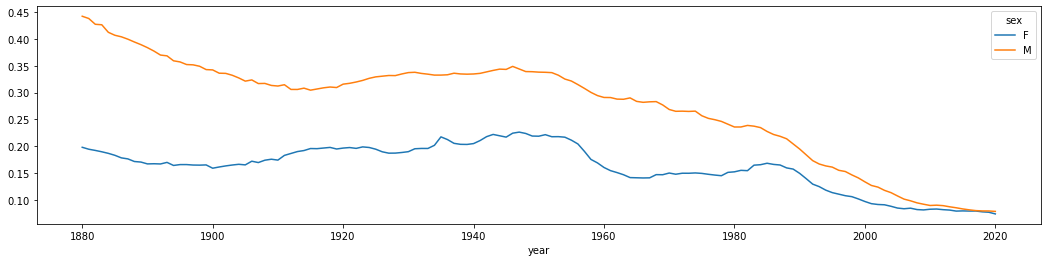

In [2]:
# lay ra top 10 names trong group
def top10names(group, n=10):
    return group.sort_values(by='births', ascending=False).head(n)

subset_01x = df_final.groupby(['year', 'sex']).apply(top10names)\
                .reset_index(drop=True)

# cummulative sum: để tính 10 tên được sử dụng phổ biến ở mỗi group, tương đương bao nhiêu % 
subset_01x['cumsum_prob'] = subset_01x.groupby(['year', 'sex'])['prob'].cumsum()
subset_01x.pivot_table('cumsum_prob', index='year', columns='sex', aggfunc='max').plot(figsize=(18, 4))


2- Ở góc nhìn khác, cũng có thể phân tích sự đa dạng tên thông qua thống kê số trẻ sinh ra theo năm và số lượng tên được sử dụng thông qua tập dữ liệu.

Số lượng tên dùng để đặt tăng mạnh, lên trên 30k - cho thấy sự đa dạng trong tên được sử dụng. > 30k tên này được dùng đặt cho ~3.67 triệu trẻ năm 2010.

Thử nghĩ nếu vẫn dùng 5000 tên của 1880, chắc sẽ rất nhiều người trùng tên nhau :)


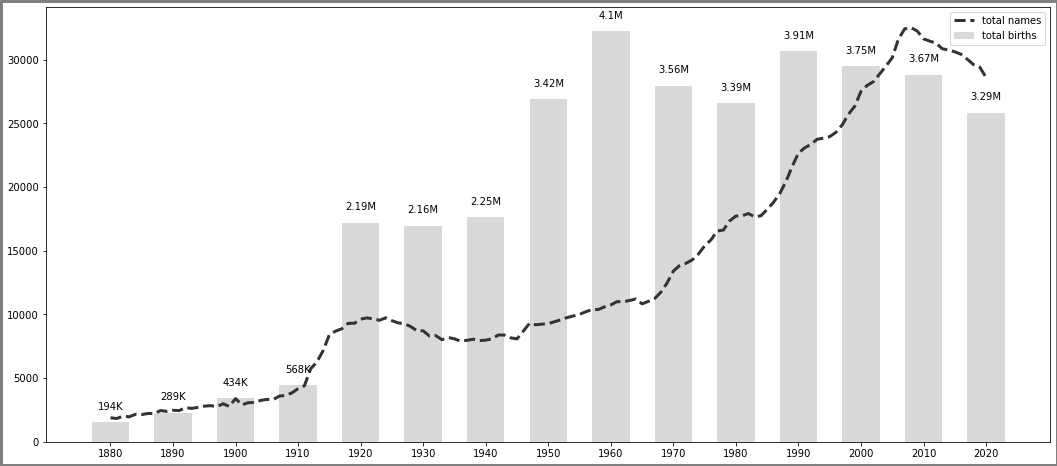

In [3]:
import matplotlib.pyplot as plt

# dùng format số
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

# tên được sử dụng theo năm
all_names_count = df_final.groupby('year')['name'].nunique()

selected_yrs = np.arange(1880, 2030, 10).tolist()
population_df = df_final.groupby('year')['births'].sum()

# vì vẽ chung chart, nên scale nó lại theo cột y
population_df_norm = population_df/population_df.max() * all_names_count.values.max()
population_df_norm_selected_yrs = population_df_norm[selected_yrs]
population_df_selected_yrs = population_df[selected_yrs]

# vẽ ra
fig, ax = plt.subplots(figsize=(18, 8), linewidth =5, edgecolor='.5')

# total names
ax.plot(all_names_count.index.values, all_names_count.values, linestyle='--', linewidth=3, color='0.2', label='total names')

# vẽ bar chart (scale chung cột y) số lượng trẻ sơ sinh
ax.bar(selected_yrs, population_df_norm_selected_yrs, 6, facecolor='0.5', alpha=.3, label='total births')

# gắn số trẻ sơ sinh (vì đơn vị tính của nó khác cột y)
for x, y, text in zip(selected_yrs, population_df_norm_selected_yrs, population_df_selected_yrs):
    ax.text(x, y + 1000, str(human_format(text)), ha='center')

ax.set_xticks(selected_yrs)

ax.legend()

3- Chart bên dưới thể hiện bình quân một tên được sử dụng cho bao nhiêu người. Mức bình quân cao ở trước 1980 và giảm dần, cho thấy tên được sử dụng ngày càng nhiều và đa dạng.

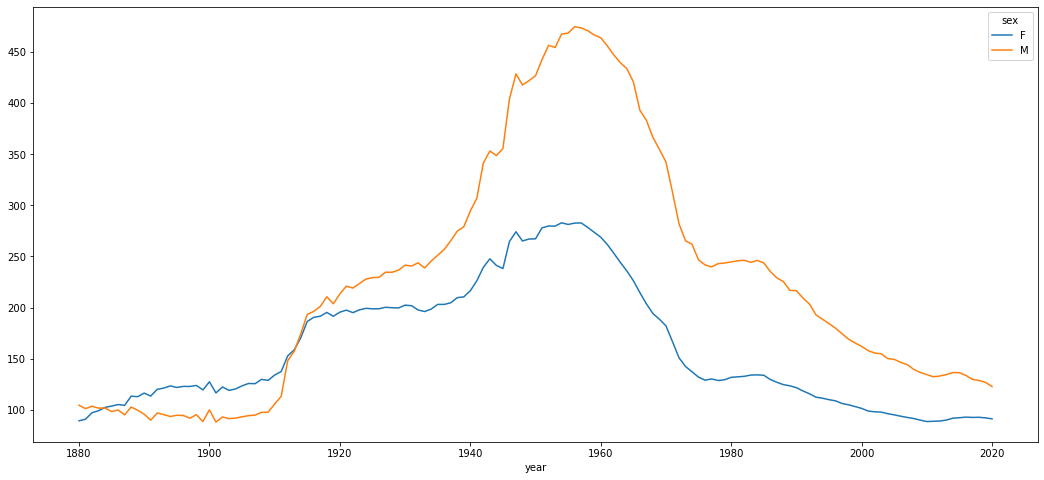

In [4]:
df_final.groupby(['year', 'sex'])['births'].mean().unstack('sex').plot(figsize=(18, 8))

## 2. Những cái tên được sử dụng phổ biến

1-
Trong 20 tên phổ biến nhất được sử dụng trong tập dữ liệu, chỉ có 3 tên nữ. Một lần nữa cho thấy tên nữ rất đa dạng

In [5]:
# top 20 ten duoc su dung nhieu nhat
df_final.groupby(['name', 'sex'])['births'].sum()\
    .nlargest(20)

name         sex
James        M      5190161
John         M      5142243
Robert       M      4829631
Michael      M      4383488
William      M      4143886
David        M      3638877
Joseph       M      2631147
Richard      M      2569278
Charles      M      2405574
Thomas       M      2325071
Christopher  M      2042956
Daniel       M      1939068
Elizabeth    F      1653689
Matthew      M      1618050
Patricia     F      1572554
George       M      1473334
Anthony      M      1455708
Barbara      F      1435049
Donald       M      1412664
Paul         M      1391502
Name: births, dtype: int64

2- Lấy thử 2 tên phổ biến của nam là James và John, cùng 2 tên của nữ là Elizabeth và Patricia để xem sự phân bố.

Tên James, John và Elizabeth khá "ổn định" tới thời điểm hiện tại. Tên James và John đặc biệt phổ biến trước 1980 cho nam. 

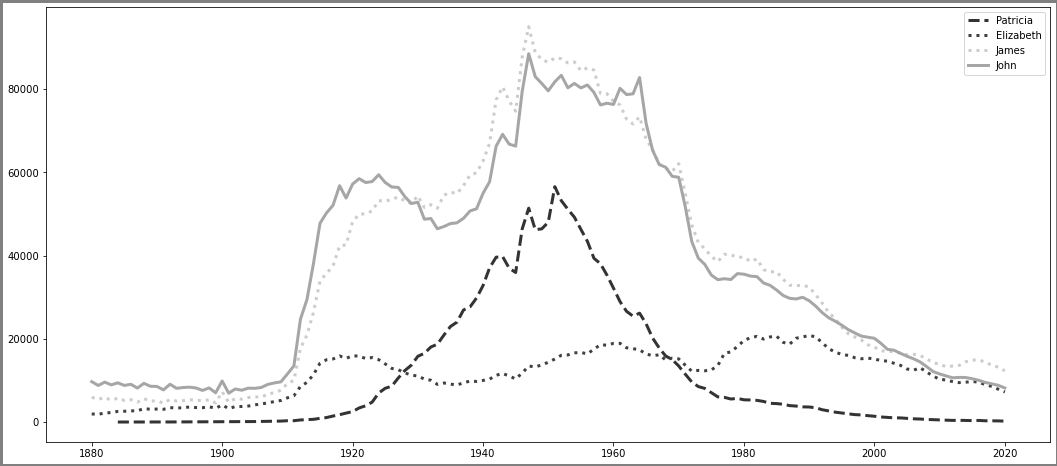

In [6]:
favourite_names =['James', 'John', 'Elizabeth', 'Patricia']
df_favourite_names = df_final[df_final['name'].isin(favourite_names)]
xDraw_df = df_favourite_names.pivot_table('births', index='year', columns='name', aggfunc='sum')

fig, ax = plt.subplots(figsize=(18, 8), linewidth =5, edgecolor='.5')

# total names
ax.plot(xDraw_df.index.values, xDraw_df['Patricia'], linestyle='--', linewidth=3, color='0.2', label='Patricia')
ax.plot(xDraw_df.index.values, xDraw_df['Elizabeth'], linestyle='dotted', linewidth=3, color='0.25', label='Elizabeth')
ax.plot(xDraw_df.index.values, xDraw_df['James'], linestyle=':', linewidth=3, color='0.8', label='James')
ax.plot(xDraw_df.index.values, xDraw_df['John'], linestyle='-', linewidth=3, color='0.65', label='John')
ax.legend()

3- 10 tên phổ biến cho nữ từ 2010->2020, dựa trên số lượng trẻ được đặt

In [7]:
subset03 = df_final[df_final['year'].isin(range(2010, 2021))]
subset03[subset03['sex']=='F'].groupby(['name'])['births'].sum().nlargest(10)

name
Ava          168690
Olivia       165783
Isabella     159407
Mia          140038
Sophia       128470
Abigail      126343
Emily        124342
Charlotte    115342
Emma         110799
Amelia       106381
Name: births, dtype: int64

3- 10 tên phổ biến cho nam từ 2010->2020, dựa trên số lượng trẻ được đặt

In [8]:
subset03[subset03['sex']=='M'].groupby(['name'])['births'].sum().nlargest(10)

name
Noah         201245
Liam         193376
William      172238
Jacob        172154
Mason        167681
Ethan        158372
Michael      154541
Alexander    152050
James        151642
Elijah       149752
Name: births, dtype: int64

## 3- Tên đặt được cho cả nam lẫn nữ
Theo tập dữ liệu, có khoảng 11k tên đã được đặt cho cả nam và nữ. Ngay cả "John" cũng dùng đặt cho nữ, dù rất ít (outlier). Tuy nhiên, sau khi test qua, có rất nhiều outlier. Do đó, phải chọn cái chặn là 1000 - có trên 1000 người đặt với cái tên đó thì mới tính tiếp. Cái này cách tiếp cận hơi cảm tính nhưng cho kết quả thực tế chấp nhận được.

Danh sách tên đặt được cho cả nam và nữ mà trong thực tế có ít nhất 1000 người đã đặt tên như vậy:

In [9]:
threshold = 1000 # chặn

# kiếm cái chặn để loại outlier
kk = df_final[df_final['births'] >= threshold]
xx = set(kk[kk['sex'] == 'M']['name'].unique())
xy = set(kk[kk['sex'] == 'F']['name'].unique())

# names dùng cho cả nam và nữ
names = list(xx&xy)
names.sort()


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
df = pd.DataFrame ({ 'names':  names})
df

,names
0,Alexis
1,Amari
2,Angel
3,Ashton
4,Avery
5,Bailey
6,Billie
7,Blake
8,Cameron
9,Casey


In [10]:
# sanity check
'John' in (xx&xy)

False

## 4- Tổng số tên trong dữ liệu

In [11]:
len(xx | xy)

1656

In [12]:
# sanity check
df_final['name'].nunique()

100364